# **New York Airbnb Analysis** 

## **Abstract:**

**Name :** **Rishiteja Reddy Narayan**

**Email :** rishitejanarayan@gmail.com

**Dataset URL:** 

 http://insideairbnb.com/new-york-city/, https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

**Introduction:** 

Airbnb is an American online marketplace for vacation rentals, headquartered in San Francisco, California. The platform, accessible via its website or app, allows users to book lodging—primarily homestays—and tourism experiences, or to list their properties for rental. Unlike traditional property owners, Airbnb does not own the properties listed; instead, it earns revenue by taking a commission on each booking. Founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia, Airbnb's name is derived from its original title, AirBedandBreakfast.com.

The company has faced criticism for driving up rent prices in cities where it operates and causing disruptions for residents living near rental properties. This has led to increased regulatory scrutiny from cities like San Francisco and New York City, as well as the European Union. Additionally, Airbnb has encountered opposition from the hotel industry and competing businesses.

**Project Overview:** 

New York, New York—isn’t it everyone’s favorite city? Tourism plays a crucial role in the city's economy, and when planning a vacation or trip to this iconic destination, the first things we usually consider are accommodation options like hotels, motels, or Airbnbs. Recently, Airbnbs have been gaining popularity and trust among travelers because they offer a more homely and personalized experience, even in an unfamiliar city. This sense of comfort and familiarity is one of the key reasons why Airbnbs are increasingly preferred over traditional hotels and motels. Additionally, Airbnbs often tend to be more affordable, making them an attractive option for budget-conscious travelers. The combination of cost-effectiveness and a cozy, home-like atmosphere is helping Airbnbs carve out a significant niche in the competitive accommodation market.

**Objective:**

This project aims to analyze and visualize the factors influencing Airbnb pricing through Exploratory Data Analysis (EDA), helping property owners set competitive prices. By identifying key variables that impact pricing, we will develop a machine learning model to predict Airbnb prices, enabling data-driven decision-making for optimizing listings. Additionally, the project will include sentiment analysis of guest reviews to uncover positive and negative feedback. This analysis will provide valuable insights for owners to enhance the guest experience and improve the appeal of their properties, ultimately driving better performance in the marketplace.

**Data Description :** 

This dataset describes the airbnb lisiting activity of home-stays in New York.

### **Table of Contents :**

1. Data Collection

2. Data Cleaning

3. Exploratory Data Analysis

4. Data Modeling

5. Modeling on Price Data

6. Model Evaluation

7. Sentiment Analysis

8. Conclusion

9. References



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Importing libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Data Collection**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NewYork/listings.csv')
data.head()

id  ... availability_365
0  2595  ...              365
1  3831  ...              249
2  5121  ...              365
3  5178  ...              343
4  5203  ...                0

[5 rows x 16 columns]

In [ ]:
data.shape

(37012, 16)

In [ ]:
#read review dataset
df_reviews = pd.read_csv('/content/drive/MyDrive/NewYork/reviews.csv.gz', compression='gzip', error_bad_lines=False)
df_reviews.head()

listing_id  ...                                           comments
0        2595  ...  Notre séjour de trois nuits.\r\nNous avons app...
1        2595  ...                                  Great experience.
2        2595  ...  I've stayed with my friend at the Midtown Cast...
3        2595  ...  We've been staying here for about 9 nights, en...
4        2595  ...  We had a wonderful stay at Jennifer's charming...

[5 rows x 6 columns]

In [ ]:
df_reviews.shape

(847727, 6)

### **Data Cleaning**

#### Check for the data types of every column in the dataset

In [ ]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Observation : This data set contains both categorical and numerical values

#### Droping unnecessary columns

In [ ]:
data.drop(['id','host_name','name','last_review'], axis=1, inplace=True)

In [ ]:
data.head()

host_id  ... availability_365
0     2845  ...              365
1     4869  ...              249
2     7356  ...              365
3     8967  ...              343
4     7490  ...                0

[5 rows x 12 columns]

#### Check null values in each column

In [ ]:
data.isnull().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9523
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### Replacing null values in the columns with 0 in the dataset 

In [ ]:
data['reviews_per_month'].fillna(0, inplace=True)
data.head()

host_id  ... availability_365
0     2845  ...              365
1     4869  ...              249
2     7356  ...              365
3     8967  ...              343
4     7490  ...                0

[5 rows x 12 columns]

In [ ]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### **Exploratory Data Analysis**

#### Checking Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37012 entries, 0 to 37011
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         37012 non-null  int64  
 1   neighbourhood_group             37012 non-null  object 
 2   neighbourhood                   37012 non-null  object 
 3   latitude                        37012 non-null  float64
 4   longitude                       37012 non-null  float64
 5   room_type                       37012 non-null  object 
 6   price                           37012 non-null  int64  
 7   minimum_nights                  37012 non-null  int64  
 8   number_of_reviews               37012 non-null  int64  
 9   reviews_per_month               37012 non-null  float64
 10  calculated_host_listings_count  37012 non-null  int64  
 11  availability_365                37012 non-null  int64  
dtypes: float64(3), int64(6), object(

#### Checking unique values and count in column host_id

In [ ]:
data.host_id.unique()

array([     2845,      4869,      7356, ..., 223719350, 146343834,
       287782529])

Finding the top 10 host id lisitings

In [ ]:
host_id = data.host_id.value_counts().head(10)
host_id

107434423    255
305240193    181
137358866    164
51501835     136
61391963     122
334163301    121
19303369     117
22541573      88
204704622     88
200239515     77
Name: host_id, dtype: int64

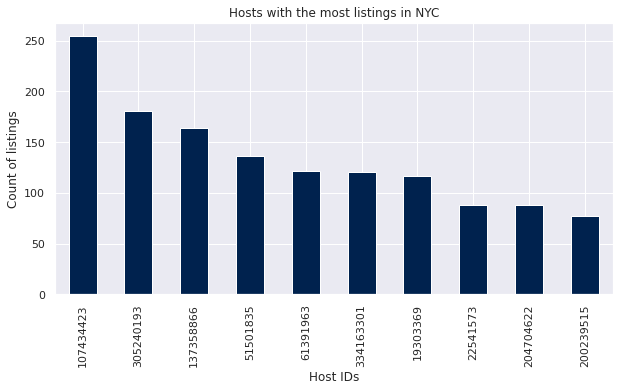

In [ ]:
plt.figure(figsize=(10,5))
sns.set(rc={'figure.figsize':(8,8)})
plt_host = host_id.plot(kind='bar', cmap='cividis')
plt_host.set_title('Hosts with the most listings in NYC')
plt_host.set_ylabel('Count of listings')
plt_host.set_xlabel("Host IDs")
plt.show()

Observation : 

The host with maximum number of listings registered for airbnb in New York has 255.

#### Listings per neighbourhood group

Checking unique values and count in column neighbourhood_group

In [ ]:
data.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
data.neighbourhood_group.value_counts()

Manhattan        16553
Brooklyn         14474
Queens            4704
Bronx              992
Staten Island      289
Name: neighbourhood_group, dtype: int64

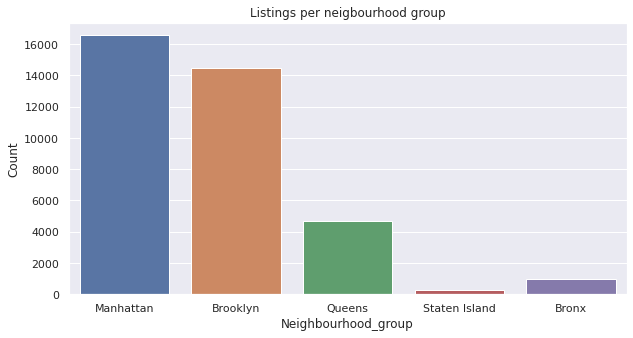

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data.neighbourhood_group)
plt.title('Listings per neigbourhood group')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Count')
plt.show()

Observation : 

The Manhattan neighbourhood group has the highest number of listings with a count of 16553 and followed by Brooklyn with a count of 14474.

#### Listings per neighbourhood

Checking unique values and count in neighbourhood column

In [ ]:
data.neighbourhood.unique()

array(['Midtown', 'Clinton Hill', 'Bedford-Stuyvesant', 'Upper West Side',
       'South Slope', 'Williamsburg', 'East Harlem', 'Fort Greene',
       "Hell's Kitchen", 'East Village', 'Harlem', 'Flatbush',
       'Long Island City', 'Jamaica', 'Greenpoint', 'Kips Bay', 'Chelsea',
       'Upper East Side', 'Prospect Heights', 'Washington Heights',
       'Woodside', 'Carroll Gardens', 'West Village', 'Park Slope',
       'Gowanus', 'Flatlands', 'Boerum Hill', 'Sunnyside',
       'Lower East Side', 'Red Hook', 'St. George', 'Tribeca',
       'Ridgewood', 'Port Morris', 'Morningside Heights',
       'Middle Village', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Windsor Terrace', 'Roosevelt Island',
       'Chinatown', 'Greenwich Village', 'Little Italy', 'Tompkinsville',
       'Clason Point', 'Eastchester', 'Inwood', 'Crown Heights', 'Nolita',
       'Astoria', 'Bushwick', 'Kingsbridge', 'Brooklyn Heights',
       'Rockaway Beach', 'Forest Hills', 'Murray Hill', 'East 

Finding top 10 neighbourhood data listings

In [ ]:
top_neighbourhood = data.neighbourhood.value_counts().head(10)
top_neighbourhood

Williamsburg          2733
Bedford-Stuyvesant    2711
Harlem                1972
Bushwick              1678
Hell's Kitchen        1506
Upper West Side       1454
Midtown               1451
Upper East Side       1342
East Village          1314
Crown Heights         1127
Name: neighbourhood, dtype: int64

neighbourhood_group
Bronx            49
Brooklyn         48
Manhattan        32
Queens           49
Staten Island    42
Name: neighbourhood, dtype: int64


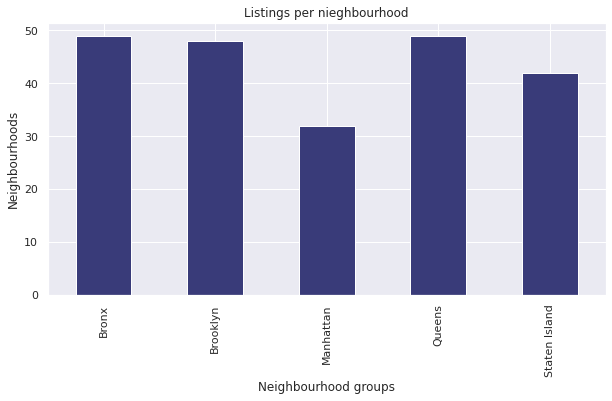

In [ ]:
plt.figure(figsize=(10,5))
data.groupby('neighbourhood_group')['neighbourhood'].nunique().plot(kind='bar', colormap='tab20b')
plt.title('Listings per nieghbourhood')
plt.xlabel('Neighbourhood groups')
plt.ylabel('Neighbourhoods')
print(data.groupby('neighbourhood_group')['neighbourhood'].nunique())
plt.show()

Observation : 

Bronx has 49 listings, which is the highest number of neighbourhoods, while Manhattan has 32 lsitings, the lowest number of neighbourhoods.

#### Room type Analysis

In [ ]:
data.room_type.value_counts()

Entire home/apt    19397
Private room       16630
Shared room          686
Hotel room           299
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room types availability in Airbnb')

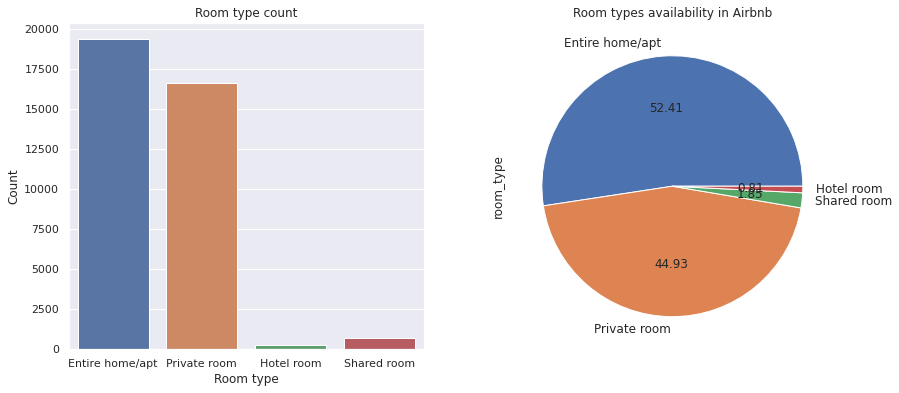

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(data.room_type)
plt.title("Room type count")
plt.xlabel('Room type')
plt.ylabel('Count')

plt.subplot(122)
plt_room = data.room_type.value_counts()/len(data.room_type)
plt_room.plot.pie(autopct='%.2f', fontsize=12)
plt.title('Room types availability in Airbnb')

Observation : 

In all the listings registered with Airbnb , more than 50% of them offer entire home/apt, 45% are for private rooms, 1.85 for shared rooms and 0.81 for hotel rooms

#### Counting the airbnb in neighbourhoods with room type category 

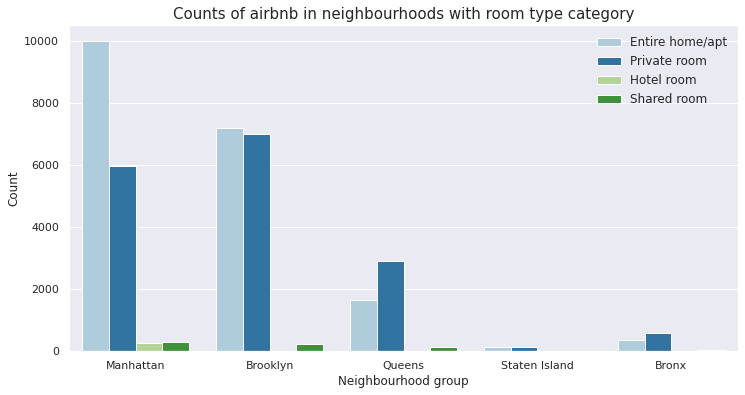

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='neighbourhood_group', hue='room_type', palette='Paired')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel("Neighbourhood group")
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)
plt.show()

Observation :

1. Manhattan is a zone which has maximum listings, primarily offers entire home/apt.

2. Brooklyn almost offers entire home/apt and private rooms equally.

3. Queens mostly offer private rooms and Saten Island, Bronx has least number o listings registered and doesn't offer much services.


#### Plotting price range for minimum nights

In [ ]:
data['price_range'] = pd.qcut(data['price'], 10)

Applying qcut tries price range to divide up the underlying data into equal sized bins

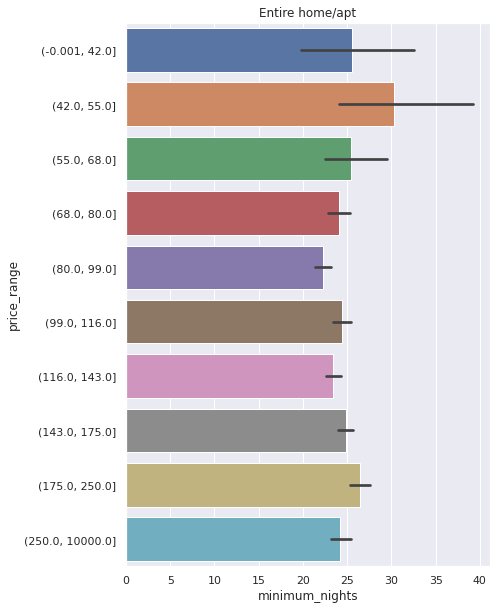

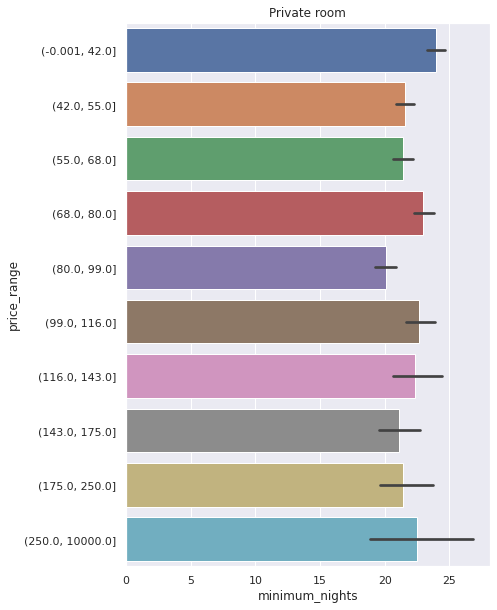

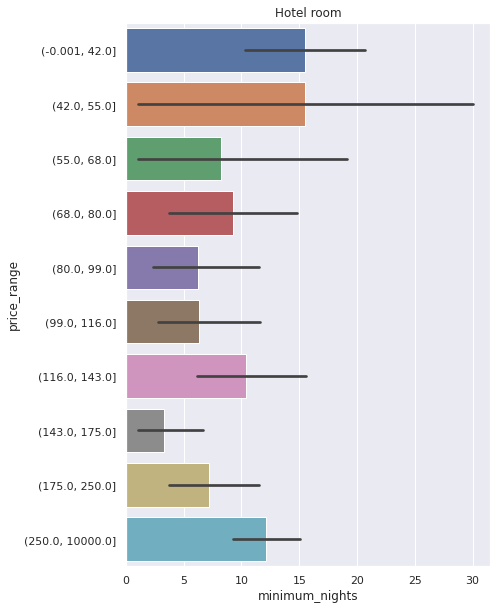

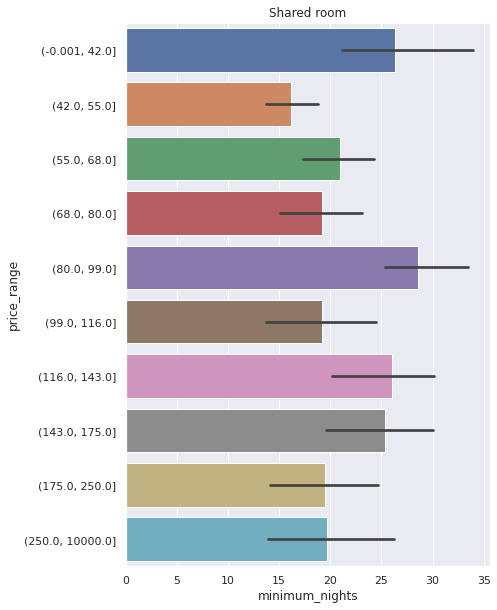

In [ ]:
rooms = list(data.room_type.unique())
for i,room in enumerate(rooms):
  plt.figure(figsize=(30,10))
  plt.subplot(1, 4, i+1)
  sns.barplot(y='price_range', x = 'minimum_nights', data = data[(data.room_type==room)])
  plt.title(room)

#### Price wise analysis of rooms

In [ ]:
data.groupby('neighbourhood_group').price.describe()

count        mean         std  ...    50%    75%      max
neighbourhood_group                                   ...                       
Bronx                  992.0   93.698589  112.860499  ...   65.0  100.0   2000.0
Brooklyn             14474.0  119.059486  169.862765  ...   89.0  140.0   6500.0
Manhattan            16553.0  179.434423  347.204197  ...  120.0  195.0  10000.0
Queens                4704.0   99.684736  269.846452  ...   69.0  100.0  10000.0
Staten Island          289.0  109.224913  120.665694  ...   80.0  125.0   1200.0

[5 rows x 8 columns]

Observation :

Check how the price is distributed with respective to neighbourhood group

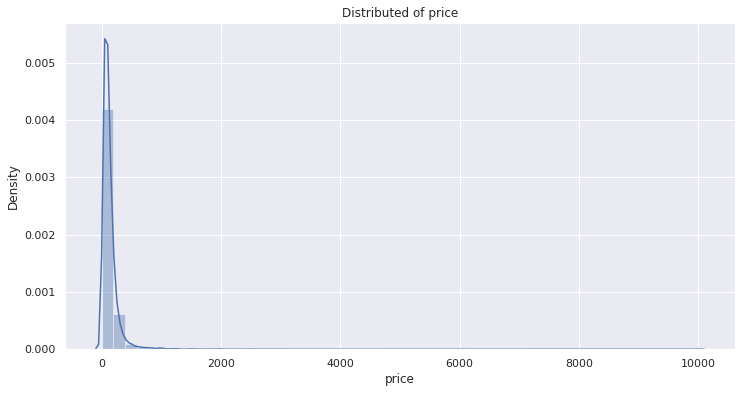

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(data.price)
plt.title('Distributed of price')
plt.show()

Observation: 

We could see most of Airbnb prices are under $1000

Borough wise price distribution

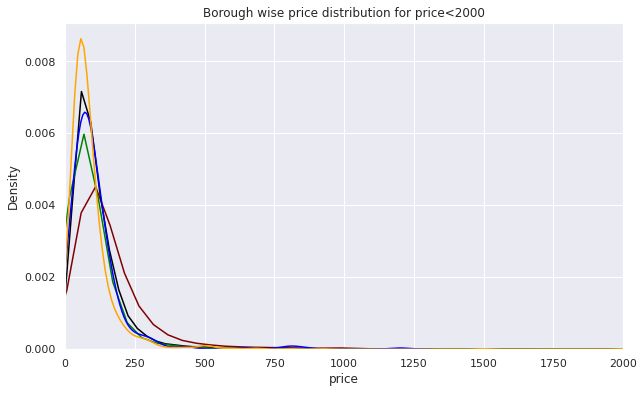

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group=='Manhattan'].price, color='maroon', hist=False, label='Manhattan')
sns.distplot(data[data.neighbourhood_group=='Brooklyn'].price, color='black', hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group=='Queens'].price, color='green', hist=False, label='Queens')
sns.distplot(data[data.neighbourhood_group=='Staten Island'].price, color='blue', hist=False, label='Staten Island')
sns.distplot(data[data.neighbourhood_group=='Bronx'].price, color='orange', hist=False, label='Bronx')
plt.title('Borough wise price distribution for price<2000')
plt.xlim(0,2000)
plt.show()

Observation : 

1. Bronx area has maximum distribution below 250 dollars followed by Brooklyn.

2. Manhattan area price's are little expensive compared to all other areas.

#### Density and distribution of prices for each neighbourhood_group

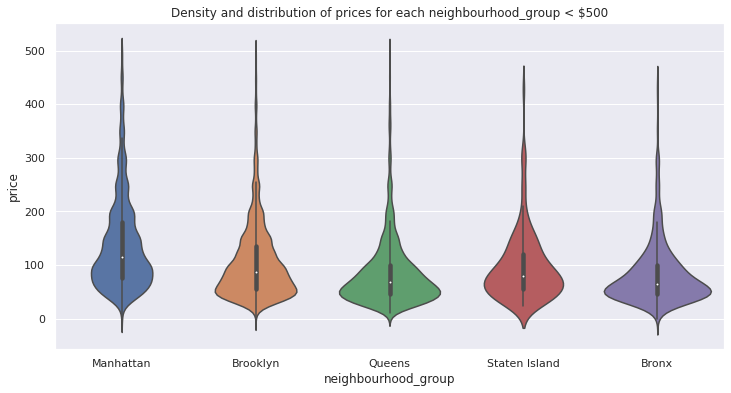

In [ ]:
#creating a sub-dataframe with no extreme values / less than 500
plt_dens = data[data.price < 500]
# using violinplot to showcaase density and distribution of prices
plt.figure(figsize=(12, 6))
plt_density = sns.violinplot(data = plt_dens, x = 'neighbourhood_group',
                                                                    y ='price')
plt_density.set_title('Density and distribution of prices for each neighbourhood_group < $500')
plt.show() 

Observation :

1. Manhattan has the highest range of prices for the listings with an average price of 120 dollars, followed by Brooklyn with 90 dollars per night.

2. Queens and Staten Island appear to have similar distributions, Bronx is the cheapest among all of them.

#### Minimum nights and price range

In [ ]:
data.groupby(['room_type', 'price_range'])['minimum_nights'].describe()

count       mean  ...    75%     max
room_type       price_range                          ...               
Entire home/apt (-0.001, 42.0]      61.0  25.606557  ...  30.00   150.0
                (42.0, 55.0]       296.0  30.256757  ...  30.00  1000.0
                (55.0, 68.0]       685.0  25.486131  ...  30.00  1124.0
                (68.0, 80.0]      1427.0  24.100911  ...  30.00   500.0
                (80.0, 99.0]      2192.0  22.264142  ...  30.00   365.0
                (99.0, 116.0]     2180.0  24.396789  ...  30.00   370.0
                (116.0, 143.0]    2957.0  23.413257  ...  30.00   500.0
                (143.0, 175.0]    3115.0  24.839807  ...  30.00   365.0
                (175.0, 250.0]    3660.0  26.417486  ...  30.00  1250.0
                (250.0, 10000.0]  2824.0  24.171388  ...  30.00  1000.0
Hotel room      (-0.001, 42.0]      28.0  15.500000  ...  30.00    30.0
                (42.0, 55.0]         2.0  15.500000  ...  22.75    30.0
                (55.0, 68.0]         8.0   8.250000  ...   8.25    30.0
                (68.0, 80.0]        21.0   9.285714  ...  30.00    30.0
                (80.0, 99.0]        22.0   6.272727  ...   1.00    30.0
                (99.0, 116.0]       33.0   6.303030  ...   1.00    60.0
                (116.0, 143.0]      28.0  10.392857  ...  30.00    30.0
                (143.0, 175.0]      26.0   3.307692  ...   1.00    30.0
                (175.0, 250.0]      34.0   7.205882  ...   3.00    30.0
                (250.0, 10000.0]    97.0  12.164948  ...  30.00    30.0
Private room    (-0.001, 42.0]    3409.0  23.930478  ...  30.00   400.0
                (42.0, 55.0]      3705.0  21.554926  ...  30.00   500.0
                (55.0, 68.0]      2448.0  21.382353  ...  30.00   365.0
                (68.0, 80.0]      2387.0  22.991202  ...  30.00   365.0
                (80.0, 99.0]      1704.0  20.075117  ...  30.00   275.0
                (99.0, 116.0]     1007.0  22.654419  ...  30.00   400.0
                (116.0, 143.0]     695.0  22.323741  ...  30.00   500.0
                (143.0, 175.0]     543.0  21.086556  ...  30.00   300.0
                (175.0, 250.0]     392.0  21.428571  ...  30.00   365.0
                (250.0, 10000.0]   340.0  22.482353  ...  30.00   365.0
Shared room     (-0.001, 42.0]     308.0  26.311688  ...  30.00   999.0
                (42.0, 55.0]       117.0  16.162393  ...  30.00    30.0
                (55.0, 68.0]        52.0  20.923077  ...  30.00    31.0
                (68.0, 80.0]        49.0  19.142857  ...  30.00    30.0
                (80.0, 99.0]        49.0  28.612245  ...  30.00   100.0
                (99.0, 116.0]       26.0  19.153846  ...  30.00    31.0
                (116.0, 143.0]      14.0  26.071429  ...  30.00    31.0
                (143.0, 175.0]      17.0  25.352941  ...  30.00    30.0
                (175.0, 250.0]      27.0  19.481481  ...  30.00    30.0
                (250.0, 10000.0]    27.0  19.703704  ...  30.00    60.0

[40 rows x 8 columns]

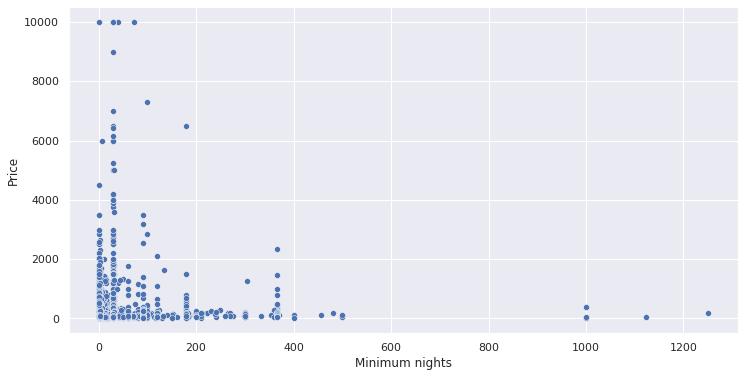

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="minimum_nights", y = 'price', data=data)
plt.xlabel("Minimum nights")
plt.ylabel("Price")
plt.show()

Observation :

Minimum number of night stays has no significant impact on prices.

<Figure size 1080x1080 with 0 Axes>

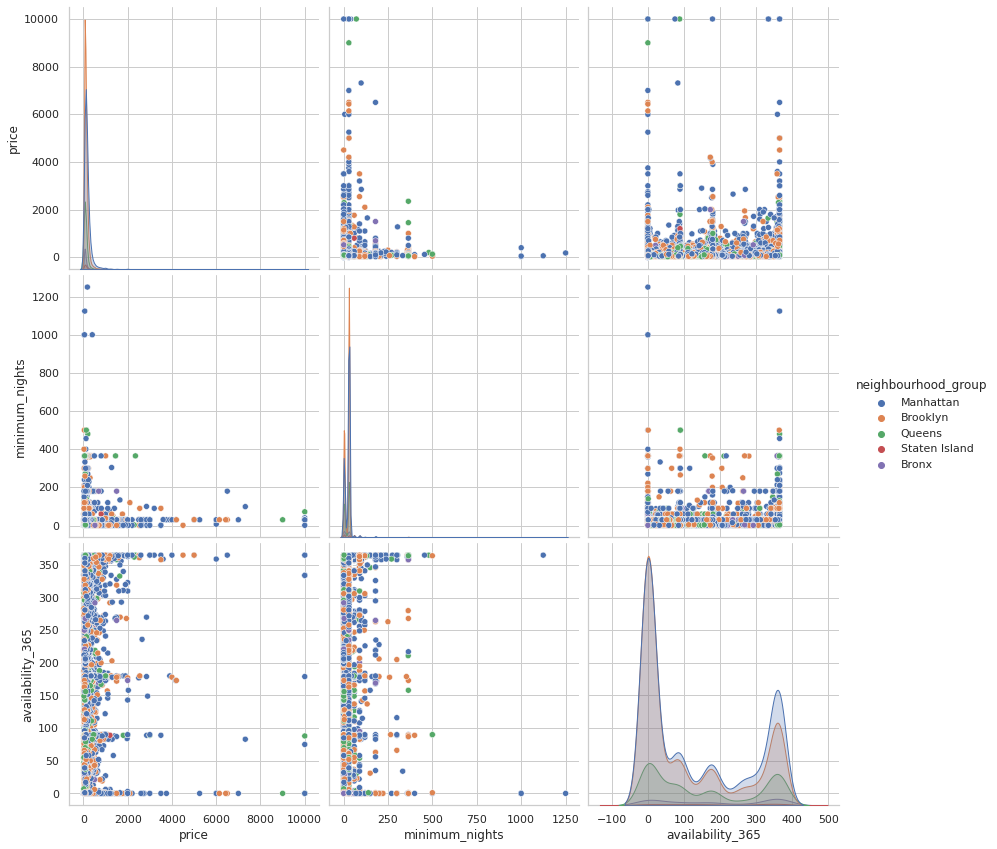

In [ ]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid");
sns.pairplot(data,hue='neighbourhood_group',vars=['price','minimum_nights',
                                                  'availability_365'],height=4,
                                                               diag_kind='kde');
plt.show() 

Observation : 

The room prices in Manhattan and Brooklyn are more when compared to other Boroughs based on their availability and minimum night stay.

#### Area wise visulaization of availability listings

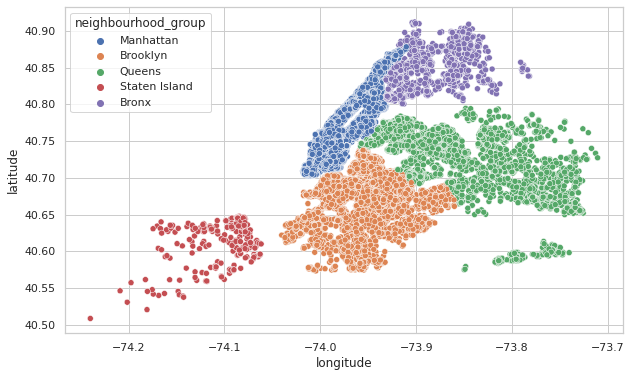

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude, data.latitude, hue=data.neighbourhood_group)
plt.ioff()

Observation :

Queens area has maximum number of listings available in neighbourhood_group

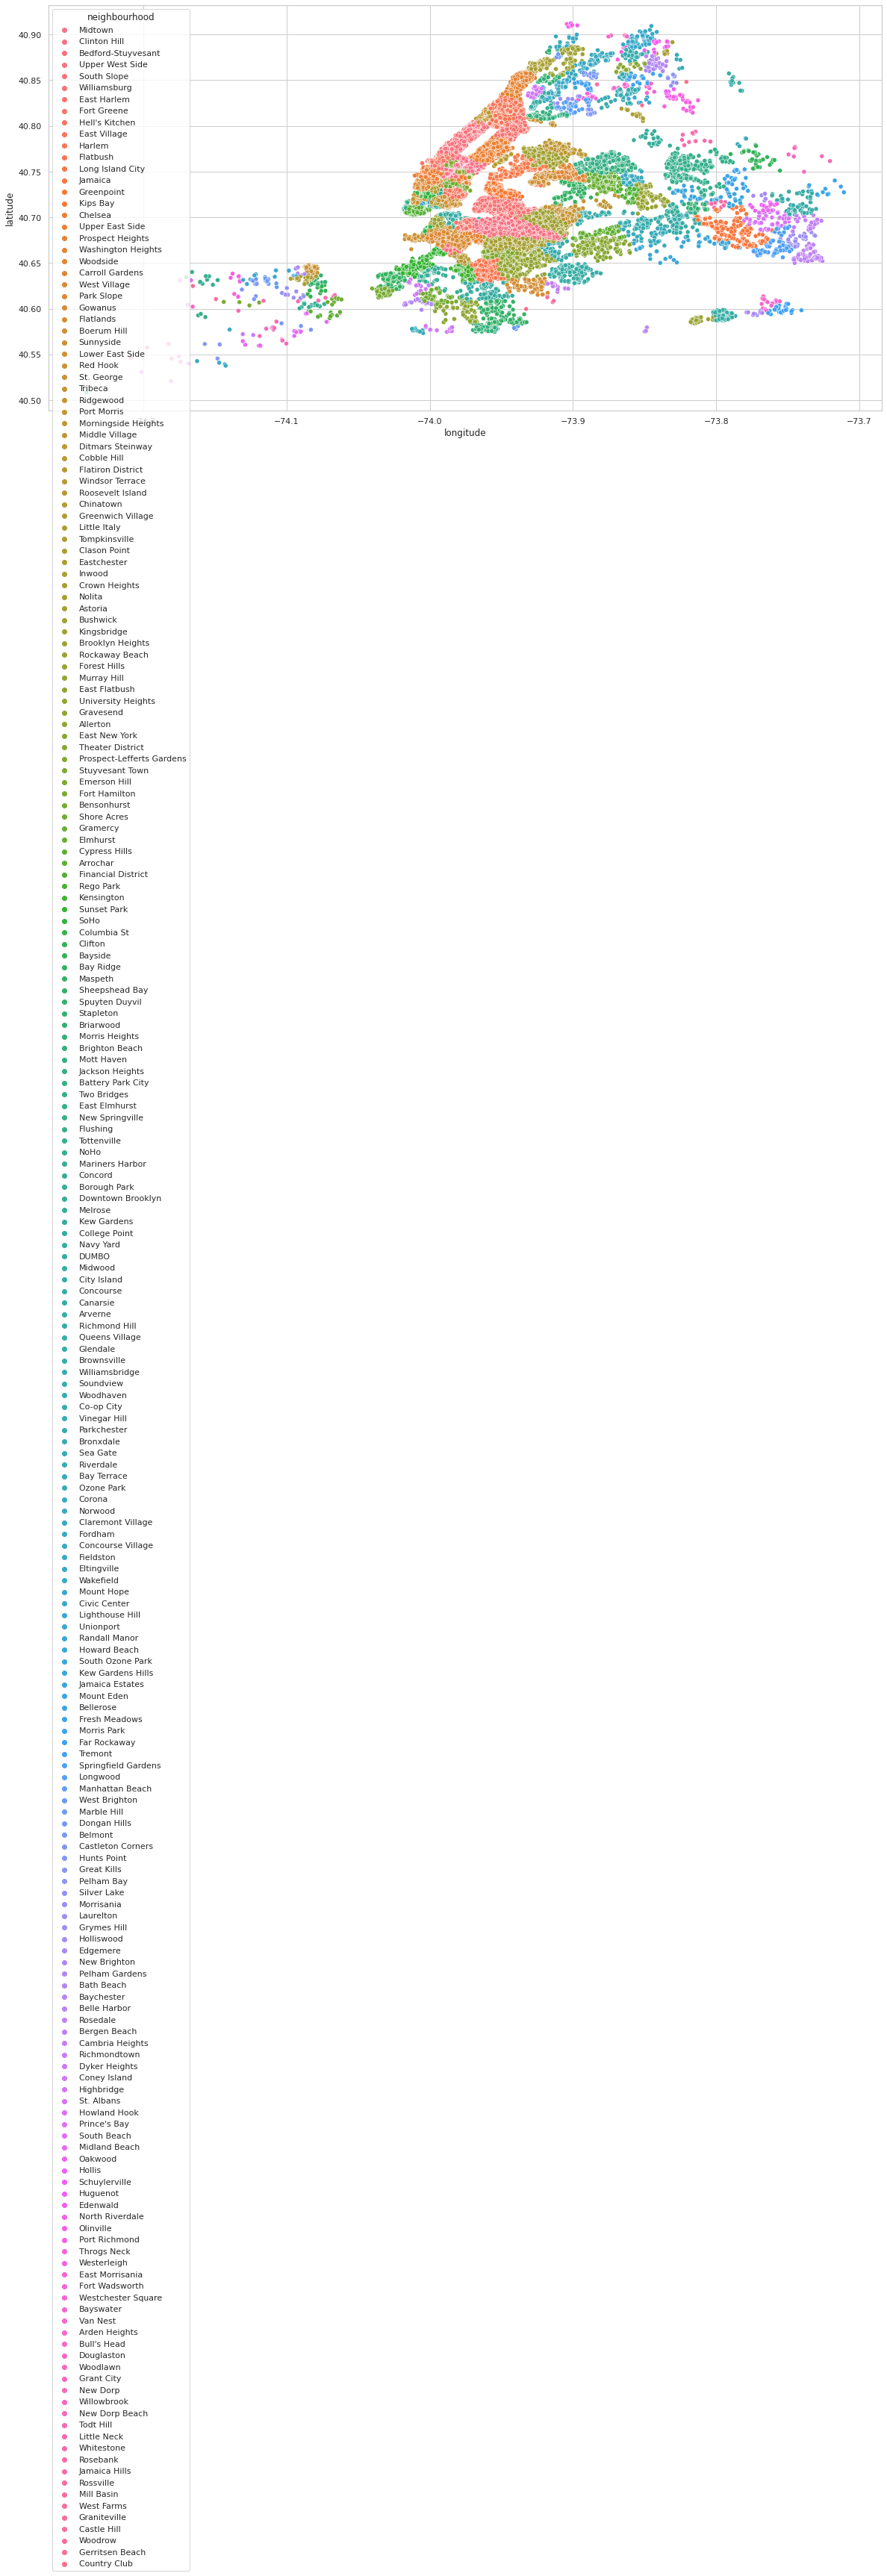

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data.longitude, data.latitude, hue=data.neighbourhood)
plt.ioff()

<Figure size 864x432 with 0 Axes>

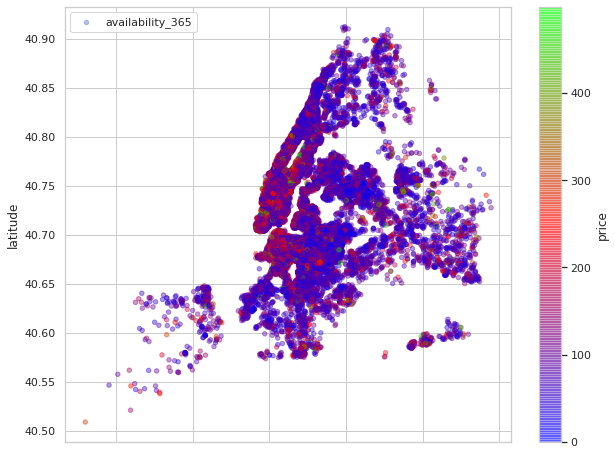

In [ ]:
plt.figure(figsize=(12,6))
pl1=data[data.price<500]
pl1.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',
         c='price',cmap=plt.get_cmap('brg'),colorbar=True,alpha=0.4,
         figsize=(10,8))
plt.show()

Observation :

In above plot shows map of Airbnb listings and colors indicate prices. Red color dots are the apartments or rooms with hihger price, considered prices upto $500 .

Manhattan region has more expensive apartments/rooms.

#### Room Availability 365

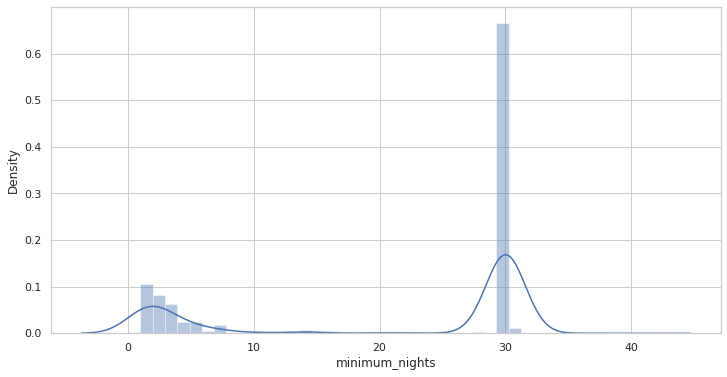

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data[(data['minimum_nights'] <= 40) & 
                  (data['minimum_nights'] > 0)]['minimum_nights'], bins=40)
plt.show()

Observation : 

Most of the listings have room availability booking for a month.

#### Correlation between different varaiables

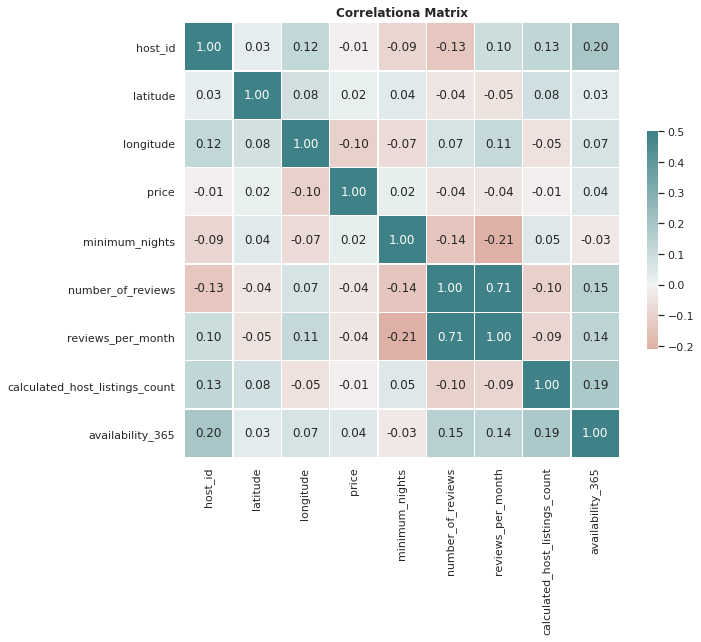

In [ ]:
plt.figure(figsize=(10,8))
palette = sns.diverging_palette(20, 200, n=256)
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.5, center=0, 
            square=True, linewidths=.3, cbar_kws={"shrink": .5}).set(ylim=(9,0))
plt.title("Correlationa Matrix", size=12, weight='bold')
plt.show();

Observation : 

The correlation table shows that there is no strong relationship between price and other features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c1d8bf210>,
      dtype=object)

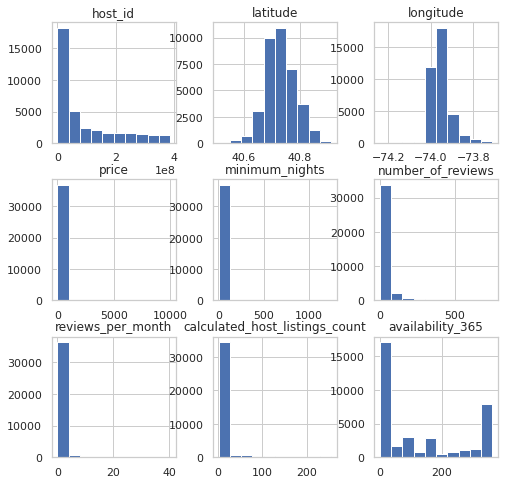

In [ ]:
data.hist()

### **Data Modeling**

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


#### Statistics of sale price


count    37012.000000
mean       142.842240
std        275.740987
min          0.000000
5%          35.000000
10%         42.000000
20%         55.000000
30%         68.000000
40%         80.000000
50%         99.000000
60%        116.000000
70%        143.000000
80%        175.000000
90%        250.000000
95%        349.000000
99%        850.000000
max      10000.000000
Name: price, dtype: float64


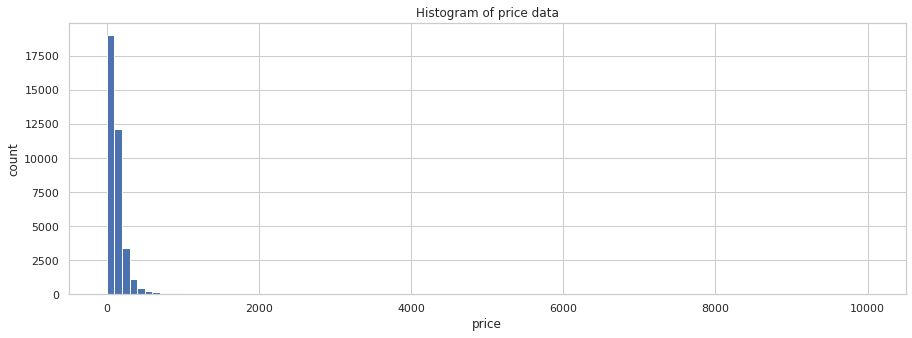

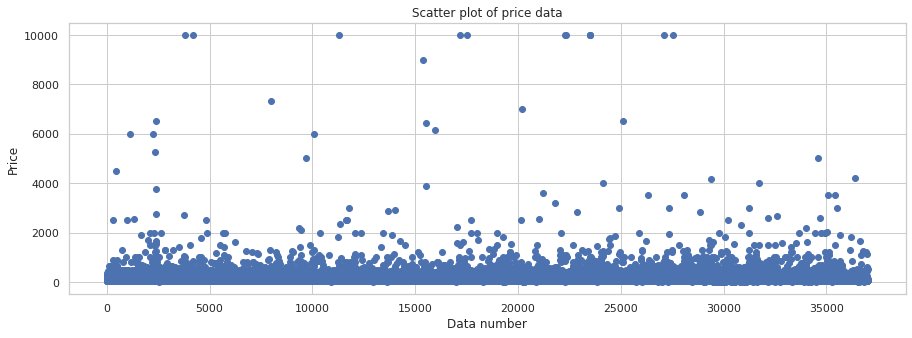

In [ ]:
print(data.price.describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,
                                       0.9,0.95,0.99]))
plt.figure(figsize=(15, 5))
plt.hist(data.price,bins=100)
plt.xlabel('price')
plt.ylabel('count')
plt.title('Histogram of price data')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(data.price,'o',markersize=6)
# plt.hist(data.price,bins=100)
plt.xlabel('Data number')
plt.ylabel("Price")
plt.title('Scatter plot of price data')
plt.show()

Observation : In the above figure, it is observed that maximum number of data points are below 349 $.


Based on above results, I will find predicitions of 95% price data set with all features.

### **Modeling on Price Data**

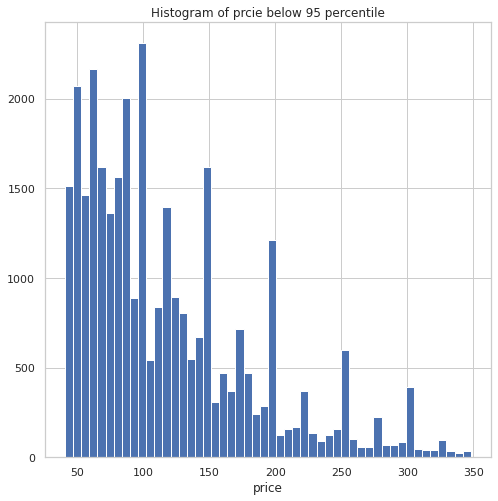

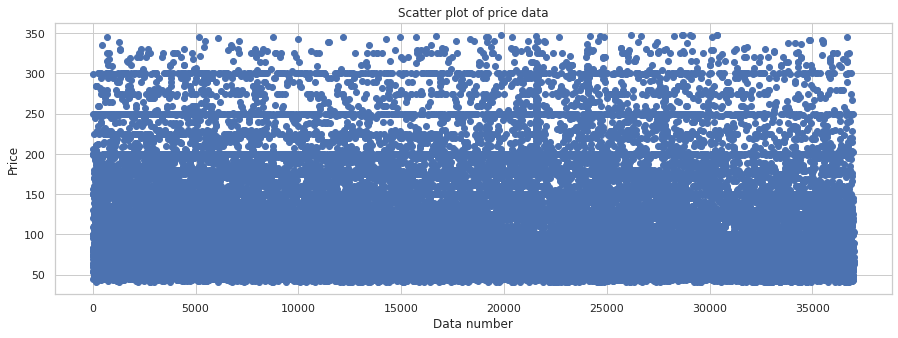

In [ ]:
import copy 

data_ML_95percent=copy.deepcopy(data)
data_ML_95percent=data_ML_95percent[data_ML_95percent['price']<349]
data_ML_95percent=data_ML_95percent[data_ML_95percent['price']>40]
data_ML_95percent=data_ML_95percent.drop(columns="price_range")

plt.figure()
plt.hist(data_ML_95percent.price,bins=50)
plt.xlabel('price')
plt.title('Histogram of prcie below 95 percentile')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(data_ML_95percent.price,'o',markersize=6)
plt.xlabel('Data number')
plt.ylabel("Price")
plt.title('Scatter plot of price data')
plt.show()

Observation : From above diagram, we can see there is a uniform desnity of data points below 300 $

In [ ]:
#encoding for categorical data
cat_columns = data_ML_95percent.select_dtypes(include=['object']).columns.values 

print("Catergory columns:",cat_columns)
for arg in cat_columns:
    
    labels = preprocessing.LabelEncoder()

    labels.fit(data_ML_95percent[arg])
    data_ML_95percent[arg]=labels.transform(data_ML_95percent[arg])

display(data_ML_95percent.head())

Catergory columns: ['neighbourhood_group' 'neighbourhood' 'room_type']


host_id  ...  availability_365
0     2845  ...               365
1     4869  ...               249
2     7356  ...               365
3     8967  ...               343
4     7490  ...                 0

[5 rows x 12 columns]

Note: By using label encoder, we are converting the label values into numeric form to use in ML techniques.

Spliting the data to Train-Test data

In [ ]:
X = copy.deepcopy(data_ML_95percent)
y = X.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Training data shape:",X_train.shape[0])
print("Test data shape:",X_test.shape[0])

Training data shape: 25309
Test data shape: 6328


Below metrics are needed for evaluating predictions :

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Mean Squared Error (MSE) measures the average squared difference between the estimated values and true values.

R^2 will be calculated to find the goodness of fit measure

#### Linear Regression

MAE (Mean Absolute Error): 34.229521473580746
MSE (Mean Squared Error): 16.23477018390736
R2 score: 0.29086333381291973


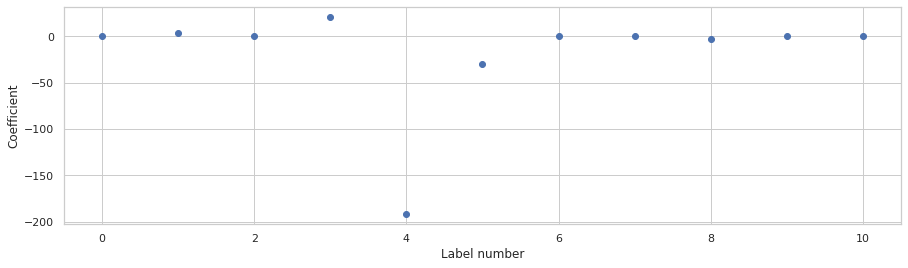

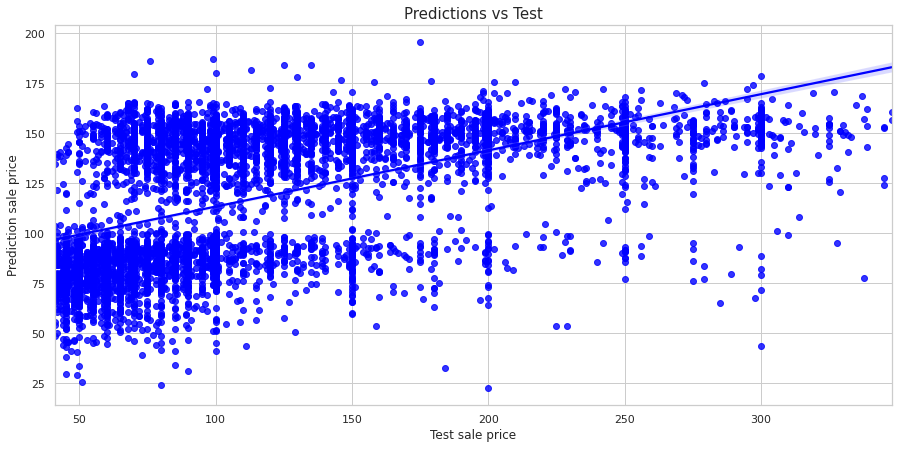

In [ ]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,4))
plt.plot(lm.coef_,'o')
plt.xlabel("Label number")
plt.ylabel("Coefficient")
plt.show()

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Prediction sale price')
plt.show()

Observation : Using Linear Regression, the mean square error is around 16.23 and mean absolute error is around 34.23

#### K-Nearest Neighbor

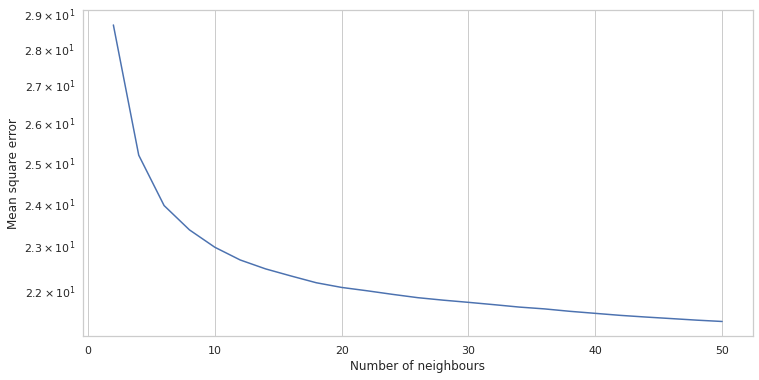

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

mae_all = []
mse_all = []
rmse_all = []
accuracy_array = []

k_array = range(2,52,2)
for k in k_array:
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance')

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
    mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.sqrt(metrics.mean_squared_error(y_test, y_pred*0))*100
    
    mae_all.append(mae)
    mse_all.append(mse)
    rmse_all.append(rmse)

plt.figure(figsize=(12,6))
plt.semilogy(k_array, mse_all)
plt.xlabel("Number of neighbours")
plt.ylabel("Mean square error")
plt.show()

Optimal  value of k is 50
MAE (Mean Absolute Error) of test data: 38.597456915870865
MSE (Mean Squared Error) of test data: 21.335281838541803
R2 score: 0.0680723863807775


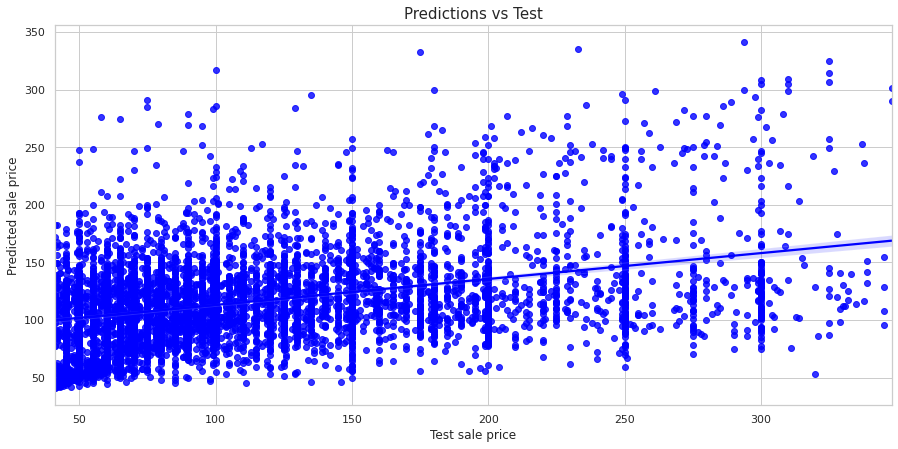

In [ ]:
min_ind = np.argmin(mse_all)
optk = k_array[min_ind]
print("Optimal  value of k is %d" % optk)

knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
knn.fit(X_train, y_train)

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()

Observation : The mean absolute error and mean squared error are high compared to linear regression.

#### Decision Tree Regression 

MAE (Mean Absolute Error) of training data: 28.44695657828955
MSE (Mean Squared Error) of training data: 13.239440127915886
RMSE (Root mean squared error) of training data: 36.386041455365664
R2 score: 0.4162156743750678
---------------------------------------------------
MAE (Mean Absolute Error) of test data: 30.495038889125414
MSE (Mean Squared Error) of test data: 14.94023392676454
RMSE (Root mean squared error) of test data: 38.65259878295965
R2 score: 0.347408829391202


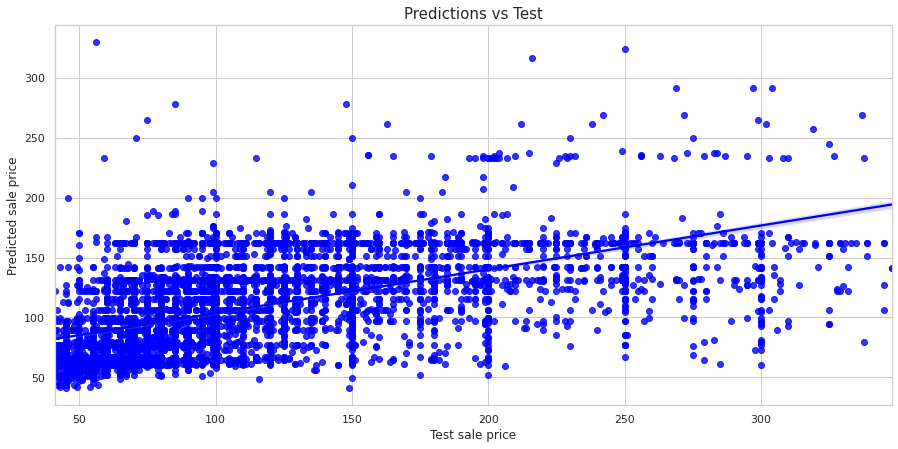

In [ ]:
from sklearn.tree import DecisionTreeRegressor

y_train_log10 = np.log10(y_train)

dtr = DecisionTreeRegressor(max_depth = 9)
dtr.fit(X_train, y_train_log10)

y_pred = dtr.predict(X_train)
y_pred=10**y_pred

mae_train = metrics.mean_absolute_error(y_train, y_pred)/metrics.mean_absolute_error(y_train, y_pred*0)*100
mse_train = metrics.mean_squared_error(y_train, y_pred)/metrics.mean_squared_error(y_train, y_pred*0)*100
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred))/np.sqrt(metrics.mean_squared_error(y_train, y_pred*0))*100
r2 = metrics.r2_score(y_train,y_pred)

print('MAE (Mean Absolute Error) of training data: %s' %mae_train)
print('MSE (Mean Squared Error) of training data: %s' %mse_train)
print('RMSE (Root mean squared error) of training data: %s' %rmse_train)
print('R2 score: %s' %r2)
print("---------------------------------------------------")

y_pred = dtr.predict(X_test)
y_pred = 10 ** y_pred

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.sqrt(metrics.mean_squared_error(y_test, y_pred*0))*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('RMSE (Root mean squared error) of test data: %s' %rmse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()

Observation : Using decision tree regression, the mean absolute and mean squared error has been improved.

#### Random Forest Regression

MAE (Mean Absolute Error) of training data: 28.831640343003993
MSE (Mean Squared Error) of training data: 13.528699349467743
R2 score: 0.4034609809776948
---------------------------------------------------
MAE (Mean Absolute Error) of test data: 29.978034178081497
MSE (Mean Squared Error) of test data: 14.44104991843361
R2 score: 0.3692132454360062


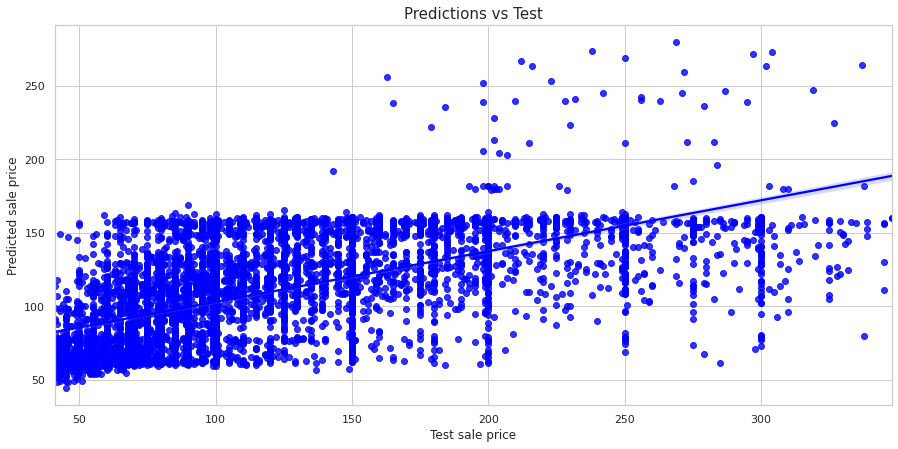

In [ ]:
from sklearn.ensemble import RandomForestRegressor

y_train_log10 = np.log10(y_train)
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train_log10)

y_pred = rfr.predict(X_train)
y_pred = 10**y_pred

mae_train = metrics.mean_absolute_error(y_train, y_pred)/metrics.mean_absolute_error(y_train, y_pred*0)*100
mse_train = metrics.mean_squared_error(y_train, y_pred)/metrics.mean_squared_error(y_train, y_pred*0)*100
r2 = metrics.r2_score(y_train,y_pred)

print('MAE (Mean Absolute Error) of training data: %s' %mae_train)
print('MSE (Mean Squared Error) of training data: %s' %mse_train)
print('R2 score: %s' %r2)
print("---------------------------------------------------")

y_pred = rfr.predict(X_test)
y_pred = 10**y_pred

mae = metrics.mean_absolute_error(y_test, y_pred)/metrics.mean_absolute_error(y_test, y_pred*0)*100
mse = metrics.mean_squared_error(y_test, y_pred)/metrics.mean_squared_error(y_test, y_pred*0)*100
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error) of test data: %s' %mae)
print('MSE (Mean Squared Error) of test data: %s' %mse)
print('R2 score: %s' %r2)

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title('Predictions vs Test', fontsize=15)
plt.xlabel('Test sale price')
plt.ylabel('Predicted sale price')
plt.show()

Observation : Random forest regression gives accurate results when compare to other models with MAE of 29.98 and MSE of 14.4.

### **Model Evaluation**

The Machine learning models used in this project, K-nearest neighbors model gives least accuracy and random forest regression predicts the sale price with best accuracy.


| Metrics | Linear Regression |   K-nearest neighbors  | Decision Tree Regression | Random Forest Regression |
| --- |  |  |  |  |
| Mean Absolute Error | 34.23 | 38.59 | 30.49 | 29.97 |
|  |  |  |  |  |
| Mean Squared Error | 16.23 | 21.33 | 14.95 | 14.41 |
|  |  |  |  |  |
| R^2 | 0.29 | 0.06 | 0.34 | 0.37 |


### **Sentiment Analysis**

#### Language Detection

In [ ]:
pip install langdetect

     |████████████████████████████████| 983kB 7.6MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=72b1b610c03b2115c02e028d9ae922ceb4dad55358c466d49889cf0f4c0c611b
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def language_detection(text):
  try:
    return detect(text)
  except:
    return None

In [ ]:
%%time
df_reviews['language'] = df_reviews['comments'].apply(language_detection)

CPU times: user 1h 11min 32s, sys: 48.2 s, total: 1h 12min 20s
Wall time: 1h 12min 26s


In [ ]:
df_reviews.language.value_counts().head(10)

en       748734
fr        28367
es        26555
de         9400
it         4794
pt         3987
zh-cn      3128
ro         2983
ko         2831
nl         2292
Name: language, dtype: int64

Observation : Reviews were given in ten different languages and english is most used language in reviews.

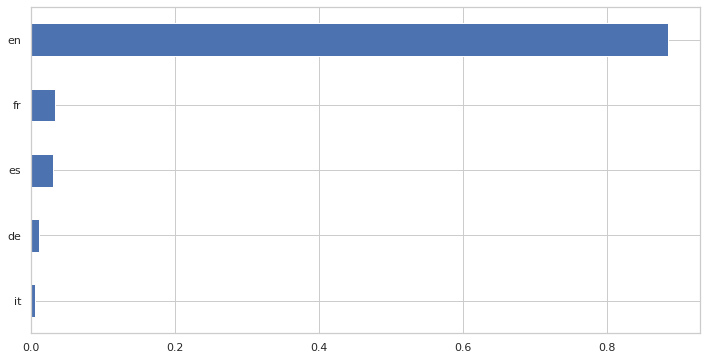

In [ ]:
# visualizing the comments languages
lang = df_reviews.language.value_counts(normalize=True).head().sort_values().plot(kind='barh', figsize=(12, 6));

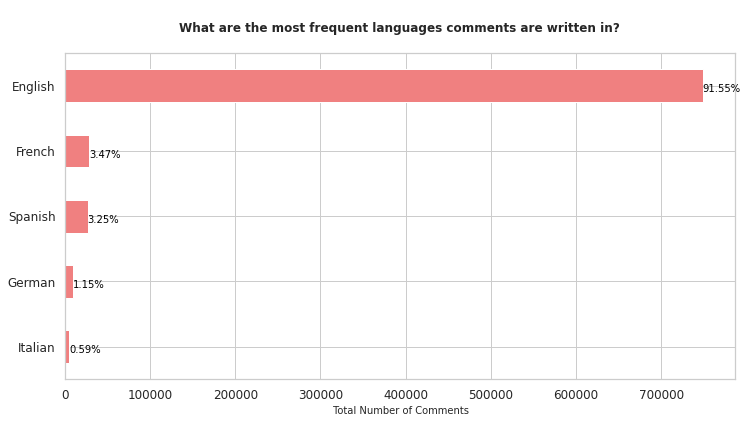

In [ ]:
# visualizing the comments' languages b) neat and clean
lang = df_reviews.language.value_counts().head().plot(kind='barh', 
                                            figsize=(12,6), color="lightcoral", 
                                             fontsize=12);

lang.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
lang.set_xlabel(" Total Number of Comments", fontsize=10)
lang.set_yticklabels(['English', 'French', 'Spanish','German', 'Italian'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in lang.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in lang.patches:
    lang.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
lang.invert_yaxis()

Observation: English is the most used language and following french and spanish stands at second and third used languages in reviews.

In [ ]:
# splitting the dataframes in language related sub-dataframes
df_eng = df_reviews[(df_reviews['language']=='en')]
df_fr  = df_reviews[(df_reviews['language']=='fr')]
df_es  = df_reviews[(df_reviews['language']=='es')]

#### Visualizing Data with WordClouds

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=14, fontweight='bold')
    plt.show()

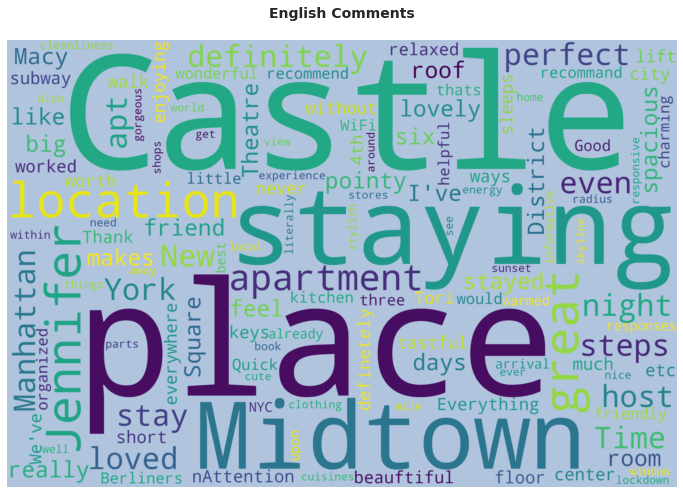

In [ ]:
wordcloud = WordCloud(max_font_size=None, max_words=1000, background_color=
                                                              "lightsteelblue", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

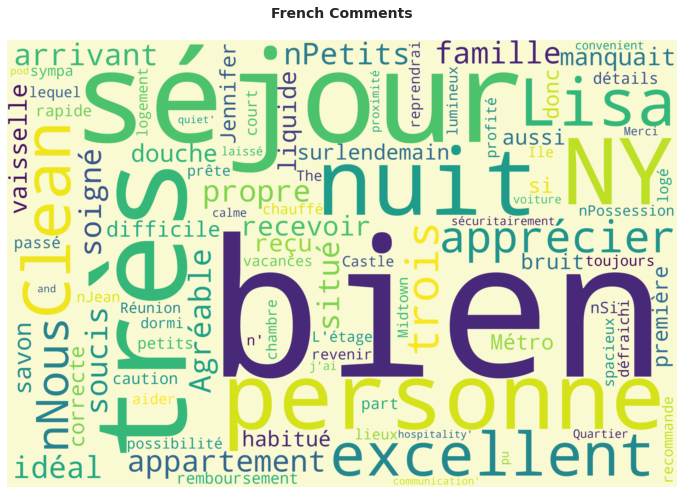

In [ ]:
wordcloud = WordCloud(max_font_size=None, max_words=250, background_color=
                                                       "lightgoldenrodyellow",
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')) .generate(str(df_fr.comments.values))

plot_wordcloud(wordcloud, 'French')

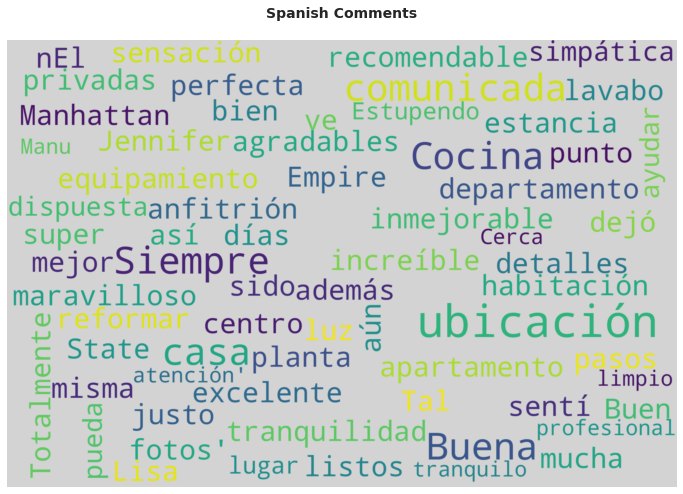

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=250, background_color=
                      "lightgrey",
                      #width=1600, height=800,
                      width=3000, height=2000,
                      stopwords=stopwords.words('spanish')).generate(str(df_es.comments.values))

plot_wordcloud(wordcloud, 'Spanish')

#### Sentiment Analysis

In [ ]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [ ]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [ ]:
%%time

df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

CPU times: user 31min 25s, sys: 6.39 s, total: 31min 31s
Wall time: 31min 34s


Let's investigate the distribution of all scores

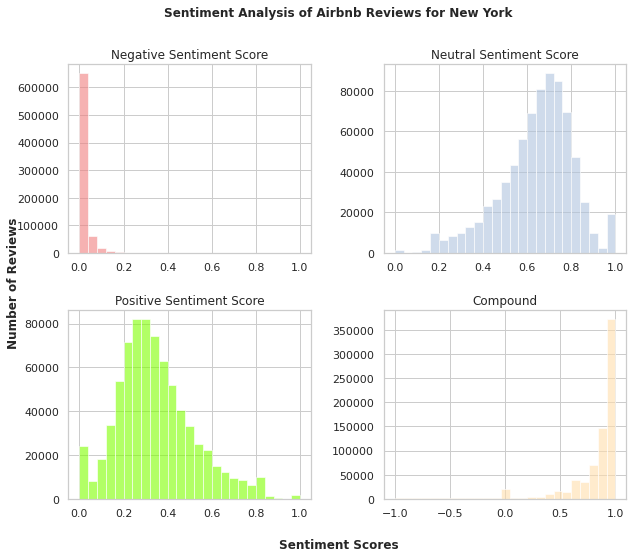

In [ ]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df_eng.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', 
            alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df_eng.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', 
            alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df_eng.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', 
            alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df_eng.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', 
            alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', 
         rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for New York\n\n', 
             fontsize=12, fontweight='bold');

In [ ]:
percentiles = df_eng.sentiment_compound.describe(percentiles=[.05, .1, .2, .3,
                                                              .4, .5, .6, .7, 
                                                              .8, .9])
percentiles

count    748734.000000
mean          0.818596
std           0.267935
min          -0.999000
5%            0.262600
10%           0.565100
20%           0.743000
30%           0.836000
40%           0.886100
50%           0.918600
60%           0.941200
70%           0.957700
80%           0.971000
90%           0.982500
max           0.999700
Name: sentiment_compound, dtype: float64

#### Comparing Negative and Positive Comments

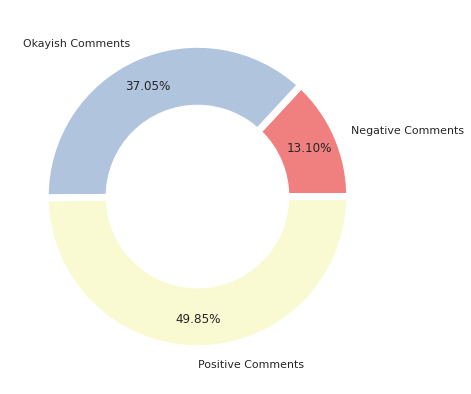

In [ ]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 
                                    'lightgoldenrodyellow'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()


Let's compare the length of both positive and negative comments

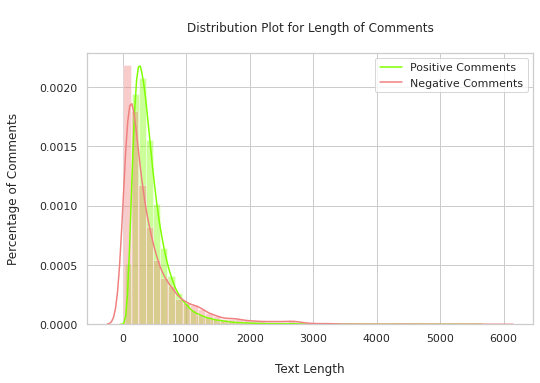

In [ ]:
#full dataframe with POSITIVE comments
df_pos = df_eng.loc[df_eng.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

# full dataframe with NEGATIVE comments
df_neg = df_eng.loc[df_eng.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

Observation: The mode for the text length of positive comments can be found more to the right than for the negative comments, which means most of the positive comments are longer than most of the negative comments. But the tail for negative comments is thicker.

In [ ]:
# read some positive comments
pos_comments[1:20]

['Jennifer was very friendly and helpful, and her place is exactly as advertised. The location is very convenient, and it was a pleasure to stay at the Midtown Castle. I definitely recommend it :)\r\n\r\nThanks !',
 'This apartment is like a real castle old and unique. The age- related stains on the bathroom floor and dark discolorations in the carpet too indeed indicate that the building was built a long, long time ago. \r\nWe weren’t happy with the way the apartment was cleaned. Jennifer, the host sent in a cleaning lady right the next morning and therefore did everything she thought was appropriate to make our stay comfortable. She let us know that guest satisfaction is important to her.   \r\nAfter we found out that the key for the main entrance was missing by locking ourselves out in the middle of the night she was so kind to bring us the missing key within an hour. \r\nWe had to leave the apartment a few days earlier because we suffered from an allergic reaction (which has never 

In [ ]:
# read some negative comments
neg_comments[1:20]

['The location made getting to Time Square easily accessible. Apartment was quiet and no disturbances from neighbors at all.',
 'First of all I have to say, that Jennifer is not allowed to sublet her apartment by her landlord. I was instructed by her to not mention airbnb to anybody beforehand, which was fine, but one evening I was stopped by her landlord in the hallway and questioned about where I am staying, how long, where Jennifer is etc. Afterwards, although I didn’t say anything wrong, Jennifer freaked out about it, and I really thought for a few hours that I would have to move out and find another place to stay right away. From that point on I felt really unsafe there and always tried to hide from the landlord. \n\nFor my stay the apartment was also not ideal, there is no couch, only cushions on the floor and there is no real table and chairs. I had to work from home sometimes and could not really do it anywhere. \nThe place was really clean in general, only the bathroom and the

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#### Investigating positive comments

Frequency Distribution

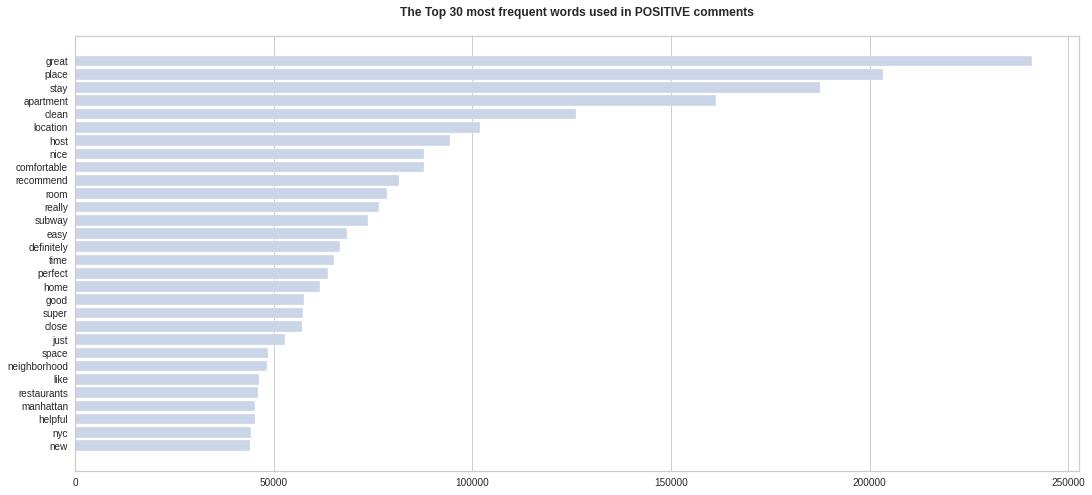

In [ ]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', 
                                                          fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, 
# plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

#### Topic Modeling

Topic Modeling is an unsupervised machine learning technique for abstracting topics from collections of documents or, in our case, for identifying which topic is being discussed in a comment.

Methods for topic modeling technique called Latent Dirichlet Allocation (LDA), a widely used topic modelling technique.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in 
                                                                         stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 

pickle.dump(corpus, open('/content/drive/MyDrive/NewYork/sentimentData/corpus.pkl', 'wb'))
dictionary.save('/content/drive/MyDrive/NewYork/sentimentData/dictionary.gensim')
import gensim

# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, 
                                           id2word=dictionary, passes=15)
ldamodel.save('/content/drive/MyDrive/NewYork/sentimentData/model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.039*"great" + 0.039*"place" + 0.033*"stay" + 0.024*"clean"')
(1, '0.013*"room" + 0.008*"u" + 0.008*"place" + 0.007*"bed"')
(2, '0.023*"subway" + 0.020*"great" + 0.018*"apartment" + 0.017*"restaurant"')


In [ ]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, 
                                           id2word=dictionary, passes=15)
ldamodel.save('/content/drive/MyDrive/NewYork/sentimentData/model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.060*"great" + 0.046*"place" + 0.039*"stay" + 0.033*"clean"')
(1, '0.030*"u" + 0.028*"place" + 0.018*"stay" + 0.016*"time"')
(2, '0.018*"room" + 0.011*"bed" + 0.010*"bathroom" + 0.009*"kitchen"')
(3, '0.024*"home" + 0.015*"place" + 0.015*"stay" + 0.013*"beautiful"')
(4, '0.021*"walk" + 0.021*"subway" + 0.020*"apartment" + 0.017*"restaurant"')


In [ ]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, 
                                           id2word=dictionary, passes=15)
ldamodel.save('/content/drive/MyDrive/NewYork/sentimentData/model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.042*"place" + 0.026*"nice" + 0.026*"clean" + 0.025*"stay"')
(1, '0.082*"u" + 0.018*"even" + 0.017*"made" + 0.012*"time"')
(2, '0.025*"home" + 0.015*"place" + 0.015*"best" + 0.014*"beautiful"')
(3, '0.038*"minute" + 0.031*"walk" + 0.022*"subway" + 0.020*"away"')
(4, '0.016*"place" + 0.012*"night" + 0.012*"room" + 0.010*"would"')
(5, '0.011*"robert" + 0.010*"la" + 0.010*"e" + 0.010*"karen"')
(6, '0.043*"apartment" + 0.040*"walking" + 0.036*"distance" + 0.027*"park"')
(7, '0.029*"room" + 0.028*"kitchen" + 0.026*"bed" + 0.021*"bathroom"')
(8, '0.057*"great" + 0.047*"stay" + 0.047*"place" + 0.035*"clean"')
(9, '0.053*"great" + 0.032*"place" + 0.022*"apartment" + 0.021*"close"')


Putting it all together - the WordCloud, the Frequency Distribution and the Topic Modelling - it is often the following criteria that make someone rate an apartment positively:

1)The apartment is clean, the bathroom are bed are nice.

2)The apartment stay feels like home.

3)The area is centrally located with short walking distances, good public transport connections, and has cafes and restaurants nearby.




Before we move on to the negative comments, let's visualize the LDA model:

The pyLDAvis library is designed to provide a visual interface for interpreting the topics derived from a topic model by extracting information from a fitted LDA topic model.

In [ ]:
dictionary = gensim.corpora.Dictionary.load('/content/drive/MyDrive/NewYork/sentimentData/dicitionary.gensim')
corpus = pickle.load(open('/content/drive/MyDrive/NewYork/sentimentData/corpus.pk1', 'rb'))

import pyLDAvis.gensim

In [ ]:
pip install pyLDAvis

In [ ]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models

The interface provides:

a left panel that depicts a global view of the model (how prevalent each topic is and how topics relate to each other);
a right panel containing a bar chart – the bars represent the terms that are most useful in interpreting the topic currently selected (what the meaning of each topic is).
On the left, the topics are plotted as circles, whose centers are defined by the computed distance between topics (projected into 2 dimensions). The prevalence of each topic is indicated by the circle’s area. On the right, two juxtaposed bars show the topic-specific frequency of each term (in red) and the corpus-wide frequency (in blueish gray). When no topic is selected, the right panel displays the top 30 most salient terms for the dataset.

In [ ]:
# visualizing 5 topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/NewYork/sentimentData/model5.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [ ]:
# visualizing 3 topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/NewYork/sentimentData/model3.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

#### Investigating Negative comments

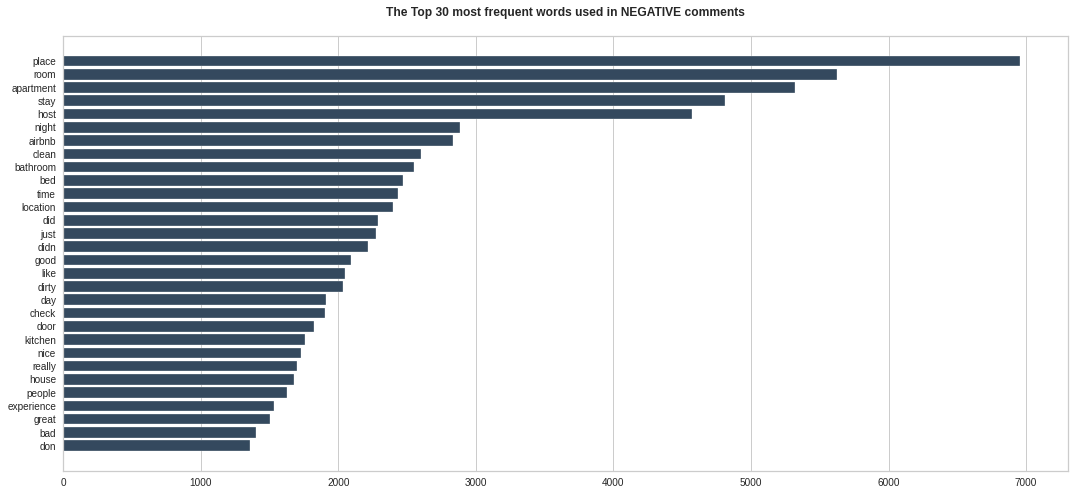

In [ ]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', 
                                                            fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, 
# plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;


In [ ]:
# calling the cleaning function we defined earlier
doc_clean = [clean(comment).split() for comment in neg_comments]

# create a dictionary from the normalized data, 
# convert this to a bag-of-words corpus
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

pickle.dump(corpus, open('/content/drive/MyDrive/NewYork/sentimentData/corpus_neg.pkl', 'wb'))
dictionary.save('/content/drive/MyDrive/NewYork/sentimentData/dictionary_neg.gensim')

In [ ]:
# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, 
                                           id2word=dictionary, passes=15)
ldamodel.save('/content/drive/MyDrive/NewYork/sentimentData/model_neg3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.014*"host" + 0.012*"room" + 0.011*"place" + 0.010*"airbnb"')
(1, '0.021*"place" + 0.014*"room" + 0.014*"apartment" + 0.011*"stay"')
(2, '0.032*"dirty" + 0.018*"bathroom" + 0.012*"sheet" + 0.011*"bed"')


In [ ]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, 
                                           id2word=dictionary, passes=15)
ldamodel.save('/content/drive/MyDrive/NewYork/sentimentData/model_neg5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.019*"host" + 0.013*"airbnb" + 0.012*"stay" + 0.011*"u"')
(1, '0.016*"dirty" + 0.014*"towel" + 0.013*"bathroom" + 0.012*"apartment"')
(2, '0.026*"room" + 0.019*"place" + 0.011*"bed" + 0.011*"bathroom"')
(3, '0.025*"place" + 0.016*"stay" + 0.015*"location" + 0.014*"apartment"')
(4, '0.025*"la" + 0.013*"que" + 0.010*"el" + 0.010*"de"')


In [ ]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, 
                                           id2word=dictionary, passes=15)
ldamodel.save('/content/drive/MyDrive/NewYork/sentimentData/model_neg10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.031*"la" + 0.017*"que" + 0.013*"el" + 0.012*"de"')
(1, '0.039*"water" + 0.032*"shower" + 0.030*"hot" + 0.024*"cold"')
(2, '0.032*"place" + 0.018*"stay" + 0.017*"location" + 0.014*"apartment"')
(3, '0.019*"recommend" + 0.017*"would" + 0.011*"corona" + 0.007*"beat"')
(4, '0.042*"room" + 0.017*"host" + 0.015*"guest" + 0.014*"u"')
(5, '0.015*"place" + 0.012*"stay" + 0.010*"night" + 0.010*"would"')
(6, '0.024*"host" + 0.014*"airbnb" + 0.014*"u" + 0.013*"day"')
(7, '0.020*"room" + 0.020*"dirty" + 0.019*"bed" + 0.019*"bathroom"')
(8, '0.021*"tax" + 0.008*"cohost" + 0.007*"per" + 0.006*"e"')
(9, '0.009*"die" + 0.007*"oliver" + 0.006*"agent" + 0.006*"und"')


In [ ]:
dictionary = gensim.corpora.Dictionary.load('/content/drive/MyDrive/NewYork/sentimentData/dictionary_neg.gensim')
corpus = pickle.load(open('/content/drive/MyDrive/NewYork/sentimentData/corpus_neg.pkl', 'rb'))

In [ ]:
#visualizing 10 topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/NewYork/sentimentData/model_neg10.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [ ]:
# visualizing 5 topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/NewYork/sentimentData/model_neg5.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [ ]:
# visualizing 3 topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/NewYork/sentimentData/model_neg3.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

### **Summary**

1. In all the listings registered with Airbnb , more than 50% of them offer entire home/apt, 45% are for private rooms, 1.85 for shared rooms and 0.81 for hotel rooms.

2. The most of Airbnb prices are under $1000.

3. Manhattan has the highest range of prices for the listings with an average price of 120 dollars, followed by Brooklyn with 90 dollars per night.

4. Queens and Staten Island appear to have similar distributions, Bronx is the cheapest among all of them.

5. Minimum number of night stays has no significant impact on prices.

6. The Machine learning models used in this project, K-nearest neighbors model gives least accuracy and random forest regression predicts the sale price with best accuracy.

7. There are almost 50% positve, 37% neutral and 13% negative comments in review dataset.

### **Conclusion :**



1. From the overall data, it is observed that Manhattan and Brooklyn are the busiest areas with maximum number of tourists.

2. Mostly the price range of airbnbs in and around Newyork city are below 350 dollars.

3. Data modelling by using few parameters did not give any good results comparing with all features results.

4. Among the ML models used in this project, Random Forest regression seems to be providing the best accurate results for both the phases that I have considered.

### **Future work**

1. In future, improving the model on prediction of price.

2. We can apply sentiment analysis on remaining languages and we will get to know the positve, neutral and negative comments.